# Friend Recommendation System on the Facebook dataset using Graph Mining

## 1. Exploratory Analysis


In [ ]:
import csv
import pandas as pd
import io
import networkx as nx
import matplotlib.pylab as plt
import numpy as np
import os
import pickle

Mounting our Google Drive to access Train and Test Data
As we can see our train data set contains Source_node and Destination_node while train dataset contains single column Source_node.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### a) Displaying part of test and train data

In [ ]:
test = pd.read_csv(filepath_or_buffer="/content/drive/MyDrive/Colab Notebooks/Facebook/test.csv",)

In [ ]:
test.head()

,source_node
0,20
1,24
2,31
3,35
4,42


In [ ]:
train = pd.read_csv(filepath_or_buffer="/content/drive/MyDrive/Colab Notebooks/Facebook/train.csv",)

In [ ]:
train.head()

,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927


We are now removing the header from each file - train and test and saving it in a new .csv
We then read training data as a graph using networkx.

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Facebook/train.csv")
train.to_csv('/content/drive/MyDrive/Colab Notebooks/Facebook/train_cleaned.csv',header=False,index=False)

g=nx.read_edgelist('/content/drive/MyDrive/Colab Notebooks/Facebook/train_cleaned.csv', delimiter=',', create_using=nx.DiGraph(), nodetype=int)
print(nx.info(g))

DiGraph with 1862220 nodes and 9437519 edges


### b) Displaying small part of the graph for better visualization

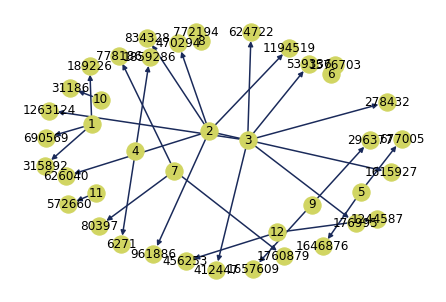

In [ ]:
pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Facebook/train.csv", nrows=30).to_csv('/content/drive/MyDrive/Colab Notebooks/Facebook/train_sample.csv', header=False, index=False)
    
sample_graph=nx.read_edgelist('/content/drive/MyDrive/Colab Notebooks/Facebook/train_sample.csv', delimiter=',', create_using=nx.DiGraph(), nodetype=int)

pos=nx.spring_layout(sample_graph)
nx.draw(sample_graph,pos, node_color='#D1D562', edge_color='#1A2A5A', width=1.5, edge_cmap=plt.cm.Blues, with_labels=True)


### c) Finding total number of users in our training dataset 
Since each node represents a user, number of nodes represents number of users


In [ ]:
print("The number of unique persons", len(g.nodes()))

The number of unique persons 1862220


### d) Analysing the number of followers and following for users
This can be given by Indegree and Outdegree. 

As we know, indegree of a vertex is the number of edges coming to the vertex, while outdegree of a vertex is the number edges which are coming out from the vertex.

Indegree of a node(user) represents the number of followers this user has while, outdegree of a node(user) is the number of users, this user is following.

#### For Indegree

In [ ]:
indegree = dict(g.in_degree())

sorted_indegree = {}
for i in sorted(indegree):
  sorted_indegree[i] = indegree[i]

x = list(sorted_indegree.keys())
y = list(sorted_indegree.values())

In [ ]:
print("Minimum number of followers a user has in our training data " + str(min(y)))
print("Maximum number of followers a user has in our training data " + str(max(y)))
print("Average number of followers a user has in our training data " + str(sum(y)/len(y)))

Minimum number of followers a user has in our training data 0
Maximum number of followers a user has in our training data 552
Average number of followers a user has in our training data 5.067886178861789


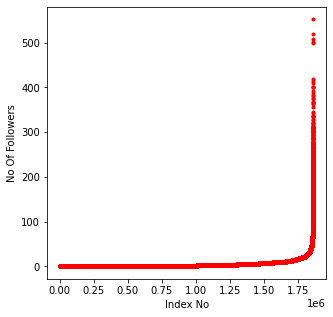

In [ ]:
# Now lets try and visualize the data distribution
y.sort()
plt.figure(figsize=(5,5))
plt.plot(y,'r.')
plt.xlabel('Index #')
plt.ylabel('# Followers')
plt.show()

#### For Outdegree


In [ ]:
outdegree = dict(g.out_degree())

sorted_outdegree = {}
for i in sorted(outdegree):
  sorted_outdegree[i] = outdegree[i]

x = list(sorted_outdegree.keys())
y = list(sorted_outdegree.values())

print("Minimum number of users a user is following in our training data " + str(min(y)))
print("Maximum number of users a user is following in our training data " + str(max(y)))
print("Average number of users a user is following in our training data " + str(sum(y)/len(y)))

Minimum number of users a user is following in our training data 0
Maximum number of users a user is following in our training data 1566
Average number of users a user is following in our training data 5.067886178861789


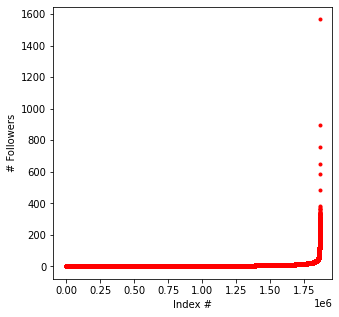

In [ ]:
# Now lets try and visualize the data distribution
y.sort()
plt.figure(figsize=(5,5))
plt.plot(y, 'r.')
plt.xlabel('Index #')
plt.ylabel('# Followers')
plt.show()

### e) Finding how well connected the graph is

#### Finding minimum and maximum number of edges

In [ ]:
from collections import Counter

inDegree = dict(g.in_degree())
outDegree = dict(g.out_degree())

d = Counter(inDegree) + Counter(outDegree)

totalEdges = np.array(list(d.values()))

print('Min number of connections a user has: ',totalEdges.min())
print(np.sum(totalEdges==totalEdges.min()),' users have ',totalEdges.min()," connections")

print('Max number of connections a user has: ',totalEdges.max())
print(np.sum(totalEdges==totalEdges.max()),' users have ',totalEdges.max()," connections")

Min number of connections a user has:  1
334291  users have  1  connections
Max number of connections a user has:  1579
1  users have  1579  connections


#### Weakly Connected Components
As seen in the below image, a graph can have disconnected components. Each of these components are called to be weakly connected. It is a subgraph that is unreachable from other nodes/vertices.




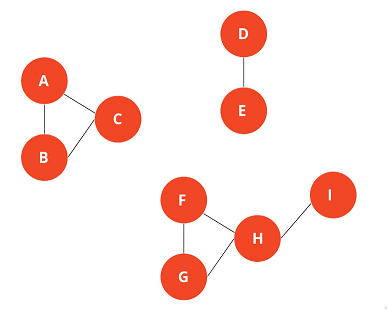

In [ ]:
print('Number of weakly connected components are: ',len(list(nx.weakly_connected_components(g))))

count=0
for i in list(nx.weakly_connected_components(g)):
    if len(i) == 2:
        count+=1
print('weakly connected components with 2 nodes',count)

No of weakly connected components 45558
weakly connected components wit 2 nodes 32195


In [ ]:
# References

# https://stackoverflow.com/questions/9402255/drawing-a-huge-graph-with-networkx-and-matplotlib
# https://matplotlib.org/3.5.0/tutorials/introductory/pyplot.html
# https://networkx.guide/algorithms/components/weakly-connected-components/
